<a href="https://colab.research.google.com/github/shirin1309/Age-and-Gender-Detection/blob/main/age_model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

NUM_CLASSES = 8

CHANNELS = 3

IMAGE_RESIZE = 96

NUM_EPOCHS = 200

STEPS_PER_EPOCH_TRAINING = 20
STEPS_PER_EPOCH_VALIDATION = 20

BATCH_SIZE_TRAINING = 80
BATCH_SIZE_VALIDATION = 30

BATCH_SIZE_TESTING = 1



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D, LeakyReLU
from keras.models import Sequential
from keras import optimizers




from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/shirin_age_model/dataset/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/drive/MyDrive/shirin_age_model/dataset/valid',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 



Found 10196 images belonging to 8 classes.
Found 2400 images belonging to 8 classes.


In [ ]:
def conv_pool_cnn(dim=224,freeze_layers=10,full_freeze='N'):

  model = ResNet50(include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  
  model = Model(inputs = model.input,outputs=x)
  
  model_final = Sequential()
  model_final.add(model)
  
  model_final.add(Dense(2048))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(1024))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(512))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
  
  model_final.add(Dense(256))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
    
  model_final.add(Dense(128))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))

  model_final.add(Dense(8,activation='softmax'))
  
  model_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  if full_freeze != 'N':
    for layer in model.layers[0:freeze_layers]:
      layer.trainable = False
  model_final.summary()
  return model_final


In [ ]:
model = conv_pool_cnn()
#model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 2048)              4196352   
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 2048)              0         
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1024)             

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = '/content/drive/MyDrive/shirin_age_model/model_age-ep{epoch:02d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'

callbacks = [ModelCheckpoint(filepath= filepath, save_best_only=False, monitor='val_loss') ]

In [ ]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))


fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        callbacks=callbacks,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
)

model.save('/content/drive/MyDrive/shirin_age_model/model/AgeModel.hdf5')
#model.save('/content/drive/MyDrive/shirin_age_model/model/AgeModel.h5')


print(fit_history.history.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/200
20/20 [==============================] - 307s 16s/step - loss: 2.0061 - accuracy: 0.3361 - val_loss: 6.3674 - val_accuracy: 0.1750
Epoch 2/200
20/20 [==============================] - 250s 13s/step - loss: 1.5149 - accuracy: 0.4575 - val_loss: 28.1507 - val_accuracy: 0.1583
Epoch 3/200
20/20 [==============================] - 205s 10s/step - loss: 1.3784 - accuracy: 0.5106 - val_loss: 7.2545 - val_accuracy: 0.1650
Epoch 4/200
20/20 [==============================] - 150s 8s/step - loss: 1.3063 - accuracy: 0.5181 - val_loss: 55.6434 - val_accuracy: 0.1617
Epoch 5/200
20/20 [==============================] - 134s 7s/step - loss: 1.2386 - accuracy: 0.5556 - val_loss: 30.2762 - val_accuracy: 0.2333
Epoch 6/200
20/20 [==============================] - 110s 6s/step - loss: 1.2217 - accuracy: 0.5350 - val_loss: 8.5302 - val_accuracy: 0.3350
Epoch 7/200
20/20 [==============================] - 92s 5s/step - loss: 1.1631 - accuracy: 0.5669 - val_loss: 2.5941 - val_accuracy: 0.4083
E

In [ ]:
from keras.models import load_model
model1=load_model('/content/drive/MyDrive/shirin_age_model/model_new_age.hdf5')
print(model1)

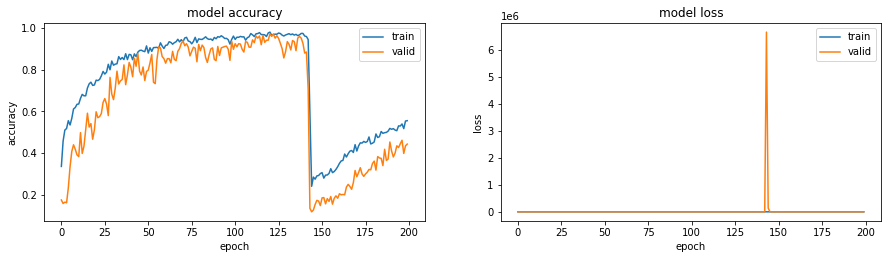

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.savefig("/content/drive/MyDrive/shirin_age_model/model/acc.png")
#plt.show()



In [ ]:
test_generator = data_generator.flow_from_directory(
    directory = '/content/drive/MyDrive/shirin_age_model/dataset/valid',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

test_generator.reset()

pred = model1.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

print(predicted_class_indices)

Found 2400 images belonging to 8 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


2400/2400 [==============================] - 506s 210ms/step
[0 0 0 ... 7 7 7]


In [ ]:
#validation_generator.reset()
pred1 = model1.predict_generator(validation_generator, steps = len(validation_generator), verbose = 1)
test_class_indices1 = np.argmax(pred1, axis = 1)
#a=test_generator.class_indices.values()
#b=list(a)
print(test_class_indices1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


80/80 [==============================] - 79s 978ms/step
[1 1 2 ... 1 5 6]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(test_class_indices1, predicted_class_indices)
clas_rep=classification_report(test_class_indices1, predicted_class_indices)
print(conf_mat)
print(clas_rep)

[[41 48 54 52 10 48 22 41]
 [58 37 49 55 16 51 21 35]
 [49 64 87 70 17 77 35 59]
 [42 62 73 52 14 60 36 50]
 [10  8 21 19  5 14 11  9]
 [54 39 70 59 22 42 25 38]
 [21 20 37 27  3 20  7 37]
 [41 44 67 55 10 37 15 28]]
              precision    recall  f1-score   support

           0       0.13      0.13      0.13       316
           1       0.11      0.11      0.11       322
           2       0.19      0.19      0.19       458
           3       0.13      0.13      0.13       389
           4       0.05      0.05      0.05        97
           5       0.12      0.12      0.12       349
           6       0.04      0.04      0.04       172
           7       0.09      0.09      0.09       297

    accuracy                           0.12      2400
   macro avg       0.11      0.11      0.11      2400
weighted avg       0.12      0.12      0.12      2400



In [ ]:
#print ("Loss = " + str(pred[0]))
#print ("Test Accuracy = " + str(pred[1]))

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

    # Exporting plot image in PNG format.
    plt.savefig(f'/content/drive/MyDrive/shirin_age_model/model/{export_as}.png', bbox_inches='tight');

Confusion matrix, without normalization


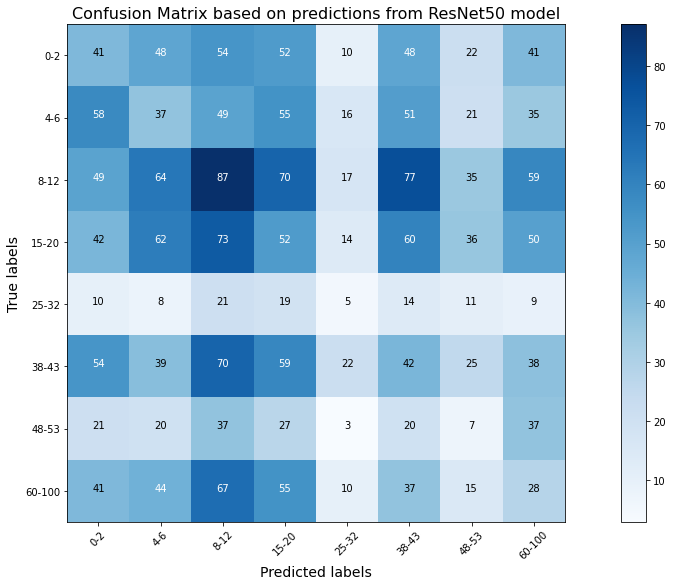

In [ ]:
import itertools    
#plot_confusion_matrix()
cm_plot_labels = ['0-2', '4-6', '8-12', '15-20', '25-32', '38-43','48-53', '60-100']
plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat, cm_plot_labels, normalize=False,
                      title="Confusion Matrix based on predictions from ResNet50 model",
                      export_as="final_resnet50_conf_mat_norm"
                     )

plt.show()

In [ ]:
print(test_generator.class_indices)

{'age_0_3': 0, 'age_15_20': 1, 'age_25_32': 2, 'age_34_48': 3, 'age_49_58': 4, 'age_4_6': 5, 'age_60_100': 6, 'age_8_12': 7}


In [ ]:
a=model1.evaluate(validation_generator)

80/80 [==============================] - 90s 1s/step - loss: 0.2764 - accuracy: 0.9329


In [ ]:
#print(model.predict('girl.jpg'))
print(validation_generator.indices)

AttributeError: ignored

In [ ]:
if os.path.exists('{}<.meta'.format("model_resnet50.hdf5")):
        model.load("model_resnet50.hdf5")
        print('model loaded!')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'